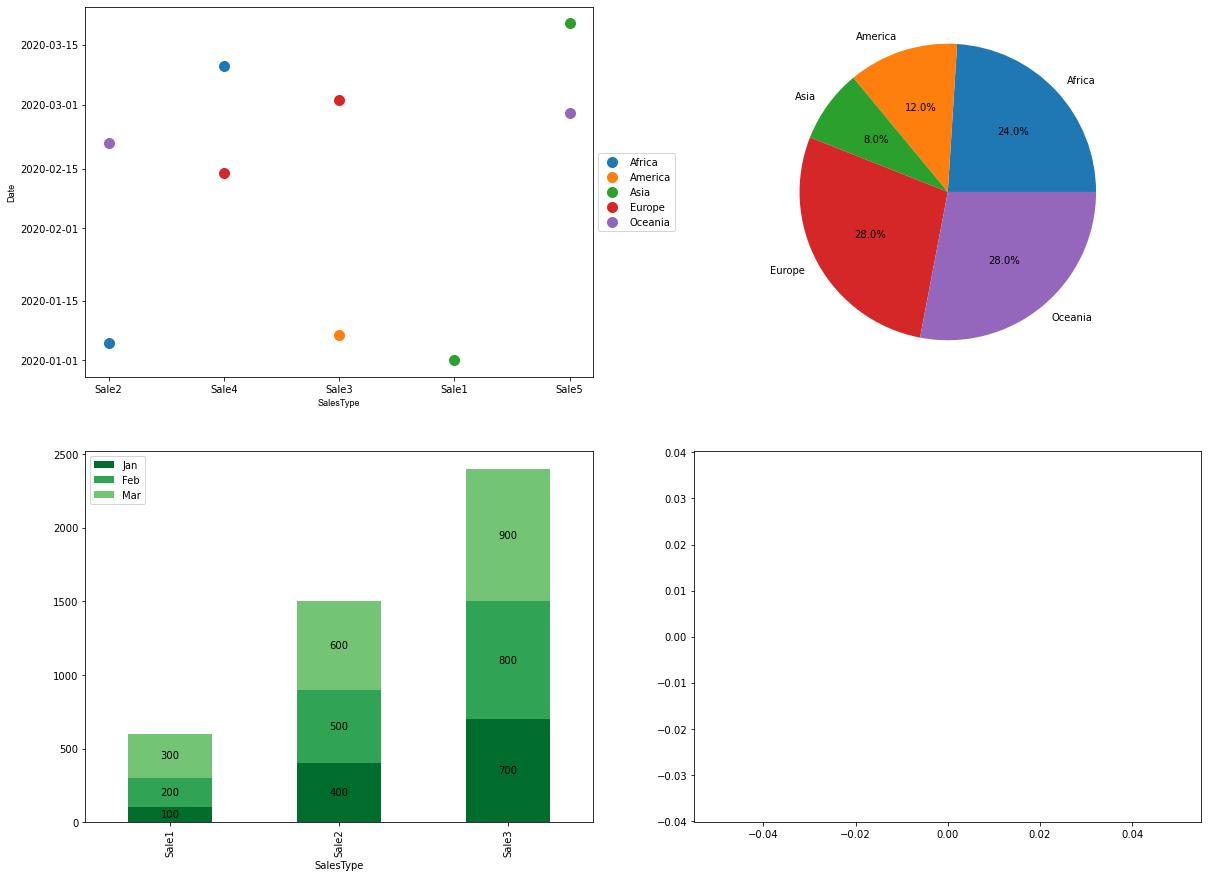

In [125]:
import numpy as np
import pandas as pd
import random
from datetime import *
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import plot
data = [
        ['Asia', 'Africa', 'America', 'Europe', 'Oceania', 'Oceania', 'Europe', 'Africa', 'Asia'], 
        ['Sale1','Sale2', 'Sale3', 'Sale4', 'Sale2','Sale5', 'Sale3', 'Sale4', 'Sale5'], 
        [1000, 2000, 3000, 4000, 5000, 2000, 3000, 4000, 1000],
        ['1/1/2020', '1/5/2020', '1/7/2020', '2/14/2020', '2/21/2020', '2/28/2020', '3/2/2020', '3/10/2020', '3/20/2020']
        ]
rows = zip(data[0], data[1], data[2], data[3])
headers = ['Region', 'SalesType', 'Sales', 'Date']
df = pd.DataFrame(rows, columns=headers)

fig, ax = plt.subplots(2,2, figsize=(20,15))

#Graph1
scatter_x = np.array(df['SalesType'])
scatter_y = np.array(pd.to_datetime(df['Date']))
group = np.array(df['Region'])
for g in np.unique(group):
    ix = np.where(group == g)
    rgb = np.random.seed(3)
    ax[0,0].scatter(scatter_x[ix], scatter_y[ix], c = rgb, label = g, s = 100)
ax[0,0].set_xlabel('SalesType', family='Arial', fontsize=9)
ax[0,0].set_ylabel('Date', family='Arial', fontsize=9)
ax[0,0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Graph2
sale = np.array(df['Sales'])
sales_sum = []
region = []
for g in np.unique(group):
    ix = np.where(group == g)
    sales = sum(sale[ix])
    sales_sum.append(sales)
    region.append(g)          
ax[0,1].pie(sales_sum, labels=region, colors=np.random.seed(3), autopct='%1.1f%%', shadow=False)    
centre_circle = plt.Circle((0,0),0.45,color='grey', fc='white',linewidth=1.25)
fig = plt.gcf()
plt.gca().add_artist(centre_circle)
plt.axis('equal')

#Graph3
data = [['Sale1', 'Sale1', 'Sale1', 'Sale2', 'Sale2', 'Sale2', 'Sale3', 'Sale3', 'Sale3'],
        ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
        [100, 200, 300, 400, 500, 600, 700, 800, 900]]

rows = zip(data[0], data[1], data[2])
headers = ['SalesType', 'Month', 'Sales']
df = pd.DataFrame(rows, columns=headers)

months = df['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df['SalesType'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, month in enumerate(months):
    values = list(df[df['Month'] == month].loc[:, 'Sales'])
    df[df['Month'] == month].plot.bar(x='SalesType',y='Sales', ax=ax[1,0], stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

list_values = (df['Sales'].tolist()[0::3] 
                + df['Sales'].tolist()[1::3] 
                + df['Sales'].tolist()[2::3])
for rect, value in zip(ax[1,0].patches, list_values):
    h = rect.get_height()/2
    w = rect.get_width()/2
    x, y = rect.get_xy()
    ax[1,0].text(x+w, y+h,value,horizontalalignment='center',verticalalignment='center')

#Graph4
df = pd.read_csv('C:\\Users\\saima\\OneDrive\\Desktop\\Book1.csv')
for col in df.columns:
    df[col] = df[col].astype(str)
    
df['text'] = df['COUNTRY'] + '<br>' + \
    'ONBOARDED PARTNERS: ' + df['ONBOARDED PARTNERS']

fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['LIVE PARTNERS'].astype(float),
    text = df['text'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Live Partners',
))

fig.update_layout(
    title_text='Live Partners and On-Boarded Partners',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='MyCompany.com',
        showarrow = False
    )]
)


plt.show()